In [1]:
%matplotlib inline

import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image
import skimage.color as sc
import matplotlib.pyplot as plt

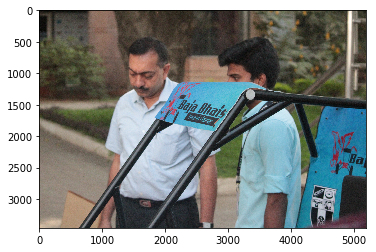

In [2]:
i = np.array(Image.open('img.jpg'))
imshow(i)

In [3]:
type(i)

numpy.ndarray

In [4]:
i.dtype

dtype('uint8')

In [5]:
i.shape

(3456, 5184, 3)

(3456, 5184)

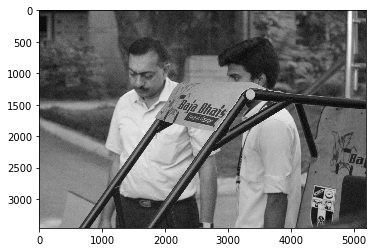

In [6]:
i_mono = sc.rgb2gray(i)
imshow(i_mono, cmap = 'gray')
i_mono.shape

## Normalizing

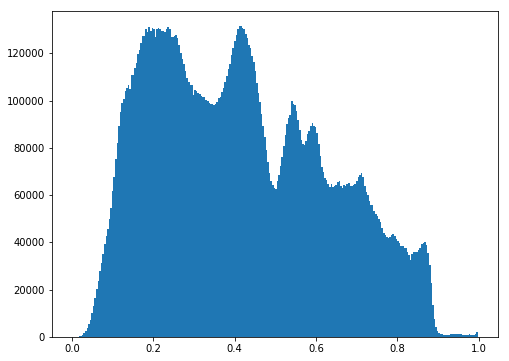

In [7]:
def im_hist(img):
    fig = plt.figure(figsize=(8,6))
    fig.clf()
    ax = fig.gca()
    ax.hist(img.flatten(), bins=256)
    plt.show()
    
im_hist(i_mono)

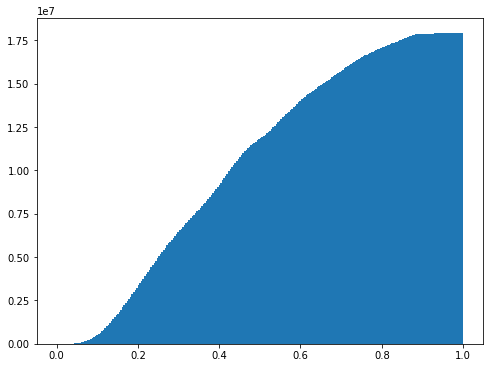

In [12]:
def im_cum(img):
    fig = plt.figure(figsize=(8,6))
    fig.clf()
    ax = fig.gca()
    ax.hist(img.flatten(), bins=256, cumulative = True)
    plt.show()
    
im_cum(i_mono)

In [13]:
from skimage import exposure

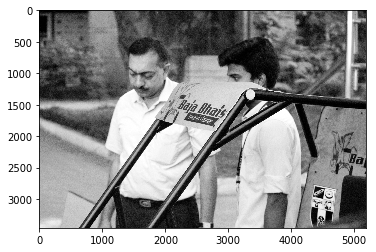

In [14]:
i_eq = exposure.equalize_hist(i_mono)
imshow(i_eq, cmap= 'gray')

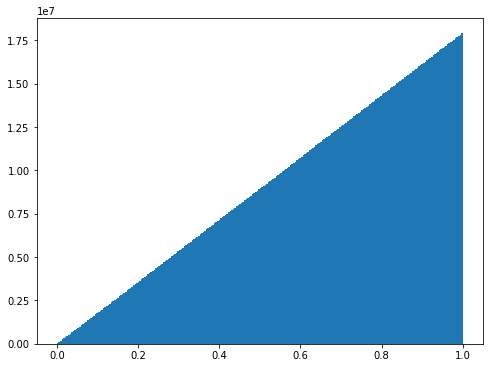

In [15]:
im_cum(i_eq)

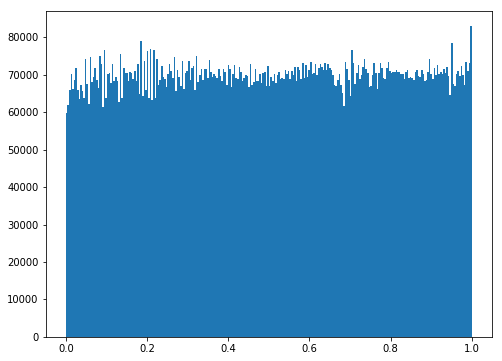

In [16]:
im_hist(i_eq)

## Denoising With Filters

In [17]:
import skimage

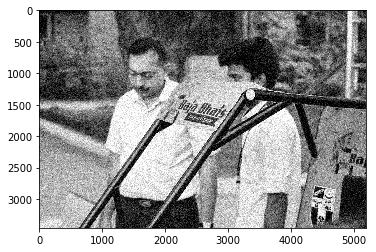

In [18]:
i_n = skimage.util.random_noise(i_eq)
imshow(i_n, cmap='gray')

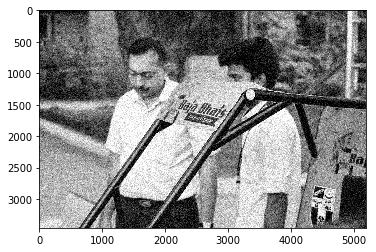

In [19]:
def gauss_filter(im, sigma=100):
    from scipy.ndimage.filters import gaussian_filter as gf
    return gf(im, sigma=sigma)

i_g = gauss_filter(i_n)
imshow(i_n, cmap='gray')

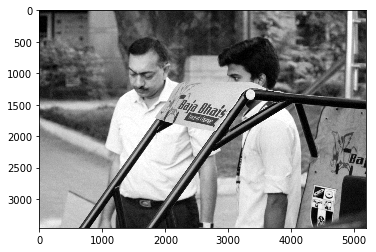

In [20]:
from scipy.ndimage.filters import median_filter as mf
i_m = mf(i_n, 10)
plt.imshow(i_m, cmap='gray')

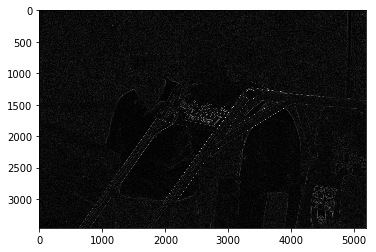

In [21]:
def edge_sobel(image):
    from scipy import ndimage
    image = sc.rgb2gray(image)
    dx = ndimage.sobel(image, 1)
    dy = ndimage.sobel(image,0)
    mag = np.hypot(dx, dy)
    mag *= 255.0/np.amax(mag)
    mag = mag.astype(np.uint8)
    return mag

i_edge = edge_sobel(i_mono)
imshow(i_edge, cmap='gray')

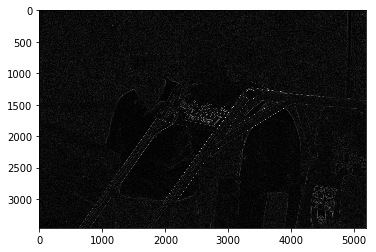

In [22]:
img = np.array(Image.open('img.jpg'))
imshow(edge_sobel(img), cmap='gray')

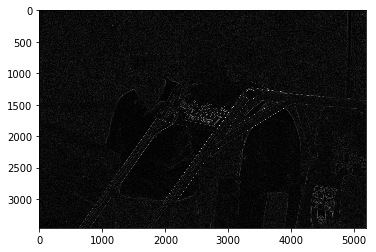

In [24]:
from scipy import ndimage
img = np.array(Image.open('img.jpg'))
img_g = sc.rgb2gray(img)
dx = ndimage.sobel(img_g, 0)
dy = ndimage.sobel(img_g, 1)
mag = np.hypot(dx, dy)
mag *= 255.0/np.amax(mag)
mag = mag.astype(np.uint8)
imshow(mag, cmap='gray')

'Done'

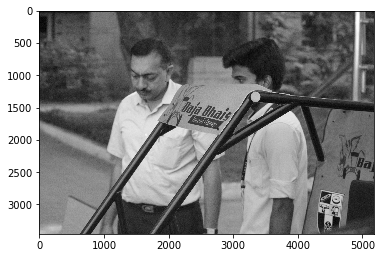

In [25]:
def corner_harris(im, min_distance=10):
    from skimage.feature import corner_harris, corner_peaks
    mag = corner_harris(im)
    return corner_peaks(mag, min_distance= min_distance)

harris = corner_harris(img_g, 10)

def plot_harris(im, harris, markersize = 20, color = 'red'):
    fig = plt.figure(figsize=(6,6))
    fig.clf()
    ax = fig.gca()
    ax.imshow(np.array(im).astype(float), cmap='gray')
    ax.plot(harris[:, 1], harris[:, 0], 'r+', color=color, markersize=markersize)
    return 'Done'

plot_harris(img_g, harris)